In [107]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import cartopy.crs as ccrs
import glob

import xclim
from matplotlib import (cm, colors)

In [105]:
def make_colourmap(vmin, vmax, n, **kwargs):
    '''
    Makes a colormap from ``vmin`` (inclusive) to ``vmax`` (exclusive) with
    ``n`` boundaries. Optionally includes choice of color and
    to extend the colormap.
    '''
    col = kwargs.pop('col', 'viridis')
    extend = kwargs.pop('extend', 'both')
    boundaries = list(np.linspace(vmin, vmax, n))
    cmap_new = cm.get_cmap(col, len(boundaries) + 1)
    colours = list(cmap_new(np.arange(len(boundaries) + 1)))
    cmap = colors.ListedColormap(colours[1:-1],"")
    cmap.set_over(colours[-1])
    cmap.set_under(colours[0])
    norm = colors.BoundaryNorm(boundaries, ncolors = len(boundaries) - 1,
                               clip = False)
    boundaries = [2*vmin-10]+boundaries+[2*vmax+10]
    return boundaries, cmap, norm

## Data

In [3]:
# read in data
ds_solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/day/pr/gn/latest/*')
ds_sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/day/pr/gn/latest/*')
ds_G1 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G1/r1i1p1f2/day/pr/gn/latest/*')
ds_585 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/day/pr/gn/latest/*')
ds_245 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/day/pr/gn/latest/*')
pi_control = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/day/pr/gn/latest/*').isel(time=slice(0,28800))

In [48]:
# modify data to calculate seasonal CWD for 2090-2100
month_time = ds_solar.sel(time = slice('2090-01-01','2099-12-30')).time.values
solar_p = ds_solar.sel(time = slice('2089-12-01','2099-11-30'))
sulfur_p = ds_sulfur.sel(time = slice('2089-12-01','2099-11-30'))
ssp245_p = ds_245.sel(time = slice('2089-12-01','2099-11-30'))
ssp585_p = ds_585.sel(time = slice('2089-12-01','2099-11-30'))

solar_p['time'] = month_time
sulfur_p['time'] = month_time
ssp245_p['time'] = month_time
ssp585_p['time'] = month_time

## CWD - maximum number of consecutive days with RR ≥ 1mm

In [112]:
# calculate CWD annual time series
cwd_solar = xclim.indicators.icclim.CWD(pr = ds_solar.sel(time = slice('2020-01-01','2099-12-30')).pr)
cwd_sulfur = xclim.indicators.icclim.CWD(pr = ds_sulfur.sel(time = slice('2020-01-01','2099-12-30')).pr)
cwd_g1 = xclim.indicators.icclim.CWD(pr = ds_G1.sel(time = slice('1870-01-01','1949-12-30')).pr)
cwd_585 = xclim.indicators.icclim.CWD(pr = ds_585.sel(time = slice('2020-01-01','2099-12-30')).pr)
cwd_245 = xclim.indicators.icclim.CWD(pr = ds_245.sel(time = slice('2020-01-01','2099-12-30')).pr)
cwd_control = xclim.indicators.icclim.CWD(pr = pi_control.pr)

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a 

In [113]:
#calculate seasonal CWD for 2090-2100
cwd_solar_seasonal = xclim.indicators.icclim.CWD(pr = solar_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
cwd_sulfur_seasonal = xclim.indicators.icclim.CWD(pr = sulfur_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
cwd_ssp245_seasonal = xclim.indicators.icclim.CWD(pr = ssp245_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
cwd_ssp585_seasonal = xclim.indicators.icclim.CWD(pr = ssp585_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(


In [114]:
#calculate seasonal means for DJF and JJA
cwd_solar_djf = cwd_solar_seasonal.sel(time=cwd_solar_seasonal.time.dt.month.isin([3])).mean('time')
cwd_sulfur_djf = cwd_sulfur_seasonal.sel(time=cwd_sulfur_seasonal.time.dt.month.isin([3])).mean('time')
cwd_ssp245_djf = cwd_ssp245_seasonal.sel(time=cwd_ssp245_seasonal.time.dt.month.isin([3])).mean('time')
cwd_ssp585_djf = cwd_ssp585_seasonal.sel(time=cwd_ssp585_seasonal.time.dt.month.isin([3])).mean('time')

cwd_solar_jja = cwd_solar_seasonal.sel(time=cwd_solar_seasonal.time.dt.month.isin([9])).mean('time')
cwd_sulfur_jja = cwd_sulfur_seasonal.sel(time=cwd_sulfur_seasonal.time.dt.month.isin([9])).mean('time')
cwd_ssp245_jja = cwd_ssp245_seasonal.sel(time=cwd_ssp245_seasonal.time.dt.month.isin([9])).mean('time')
cwd_ssp585_jja = cwd_ssp585_seasonal.sel(time=cwd_ssp585_seasonal.time.dt.month.isin([9])).mean('time')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/utils.py:34: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_exec

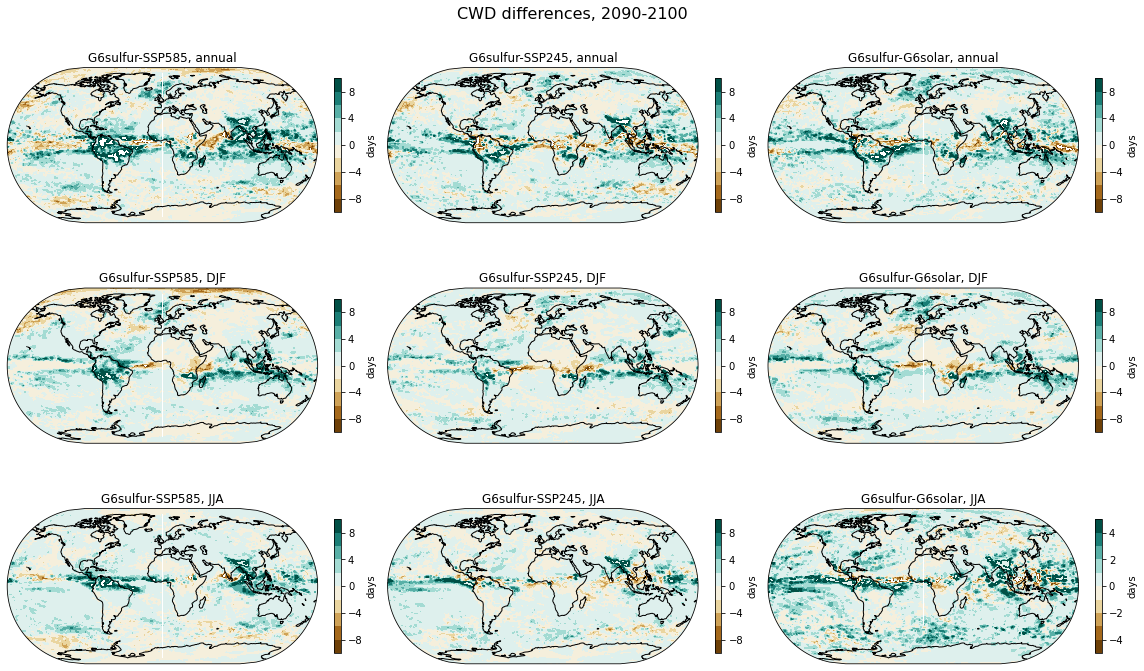

In [135]:
fig1, axs1 = plt.subplots(nrows=3, ncols=3, figsize=(16, 10), subplot_kw={'projection': ccrs.EckertIII()})
# annual
# SSP585-G6sulfur
cf1 = axs1[0,0].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur.sel(time = slice('2090','2099')).mean('time')-cwd_585.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf1, ax=axs1[0,0], orientation='vertical', fraction=0.02, label="days")
axs1[0,0].coastlines()
axs1[0,0].set_global()
axs1[0,0].set_title("G6sulfur-SSP585, annual")
# SSP245-G6sulfur
cf2 = axs1[0,1].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur.sel(time = slice('2090','2099')).mean('time')-cwd_245.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf2, ax=axs1[0,1], orientation='vertical',fraction=0.02, label="days")
axs1[0,1].coastlines()
axs1[0,1].set_global()
axs1[0,1].set_title("G6sulfur-SSP245, annual")
# G6solar-G6sulfur
cf3 = axs1[0,2].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur.sel(time = slice('2090','2099')).mean('time')-cwd_solar.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf3, ax=axs1[0,2], orientation='vertical',fraction=0.02, label="days")
axs1[0,2].coastlines()
axs1[0,2].set_global()
axs1[0,2].set_title("G6sulfur-G6solar, annual")
# DJF
# SSP585-G6sulfur
cf4 = axs1[1,0].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur_djf-cwd_ssp585_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf4, ax=axs1[1,0], orientation='vertical', fraction=0.02, label="days")
axs1[1,0].coastlines()
axs1[1,0].set_global()
axs1[1,0].set_title("G6sulfur-SSP585, DJF")
# SSP545-G6sulfur
cf5 = axs1[1,1].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur_djf-cwd_ssp245_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf5, ax=axs1[1,1], orientation='vertical', fraction=0.02, label="days")
axs1[1,1].coastlines()
axs1[1,1].set_global()
axs1[1,1].set_title("G6sulfur-SSP245, DJF")
# G6solar-G6sulfur
cf6 = axs1[1,2].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur_djf-cwd_solar_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf6, ax=axs1[1,2], orientation='vertical', fraction=0.02, label="days")
axs1[1,2].coastlines()
axs1[1,2].set_global()
axs1[1,2].set_title("G6sulfur-G6solar, DJF")
# JJA
# SSP585-G6sulfur
cf7 = axs1[2,0].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur_jja-cwd_ssp585_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap='BrBG')
fig1.colorbar(cf7, ax=axs1[2,0], orientation='vertical', fraction=0.02, label="days")
axs1[2,0].coastlines()
axs1[2,0].set_global()
axs1[2,0].set_title("G6sulfur-SSP585, JJA")
# SSP245-G6sulfur
cf8 = axs1[2,1].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur_jja-cwd_ssp245_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap='BrBG')
fig1.colorbar(cf8, ax=axs1[2,1], orientation='vertical', fraction=0.02, label="days")
axs1[2,1].coastlines()
axs1[2,1].set_global()
axs1[2,1].set_title("G6sulfur-SSP245, JJA")
# G6solar-G6sulfur
cf9 = axs1[2,2].contourf(ds_solar.lon, ds_solar.lat, cwd_sulfur_jja-cwd_solar_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11), cmap='BrBG')
fig1.colorbar(cf9, ax=axs1[2,2], orientation='vertical', fraction=0.02, label="days")
axs1[2,2].coastlines()
axs1[2,2].set_global()
axs1[2,2].set_title("G6sulfur-G6solar, JJA")
fig1.suptitle("CWD differences, 2090-2100", fontsize=16)
fig1.tight_layout()

## R20mm - Count of days when PRCP≥ 20mm

In [96]:
r20_solar = xclim.indicators.icclim.R20mm(pr = ds_solar.sel(time = slice('2020-01-01','2099-12-30')).pr)
r20_sulfur = xclim.indicators.icclim.R20mm(pr = ds_sulfur.sel(time = slice('2020-01-01','2099-12-30')).pr)
r20_g1 = xclim.indicators.icclim.R20mm(pr = ds_G1.sel(time = slice('1870-01-01','1949-12-30')).pr)
r20_585 = xclim.indicators.icclim.R20mm(pr = ds_585.sel(time = slice('2020-01-01','2099-12-30')).pr)
r20_245 = xclim.indicators.icclim.R20mm(pr = ds_245.sel(time = slice('2020-01-01','2099-12-30')).pr)
r20_control = xclim.indicators.icclim.R20mm(pr = pi_control.pr)

r20_solar_seasonal = xclim.indicators.icclim.R20mm(pr = solar_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
r20_sulfur_seasonal = xclim.indicators.icclim.R20mm(pr = sulfur_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
r20_ssp245_seasonal = xclim.indicators.icclim.R20mm(pr = ssp245_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
r20_ssp585_seasonal = xclim.indicators.icclim.R20mm(pr = ssp585_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a 

In [97]:
#calculate seasonal means for DJF and JJA
r20_solar_djf = r20_solar_seasonal.sel(time=r20_solar_seasonal.time.dt.month.isin([3])).mean('time')
r20_sulfur_djf = r20_sulfur_seasonal.sel(time=r20_sulfur_seasonal.time.dt.month.isin([3])).mean('time')
r20_ssp245_djf = r20_ssp245_seasonal.sel(time=r20_ssp245_seasonal.time.dt.month.isin([3])).mean('time')
r20_ssp585_djf = r20_ssp585_seasonal.sel(time=r20_ssp585_seasonal.time.dt.month.isin([3])).mean('time')

r20_solar_jja = r20_solar_seasonal.sel(time=r20_solar_seasonal.time.dt.month.isin([9])).mean('time')
r20_sulfur_jja = r20_sulfur_seasonal.sel(time=r20_sulfur_seasonal.time.dt.month.isin([9])).mean('time')
r20_ssp245_jja = r20_ssp245_seasonal.sel(time=r20_ssp245_seasonal.time.dt.month.isin([9])).mean('time')
r20_ssp585_jja = r20_ssp585_seasonal.sel(time=r20_ssp585_seasonal.time.dt.month.isin([9])).mean('time')

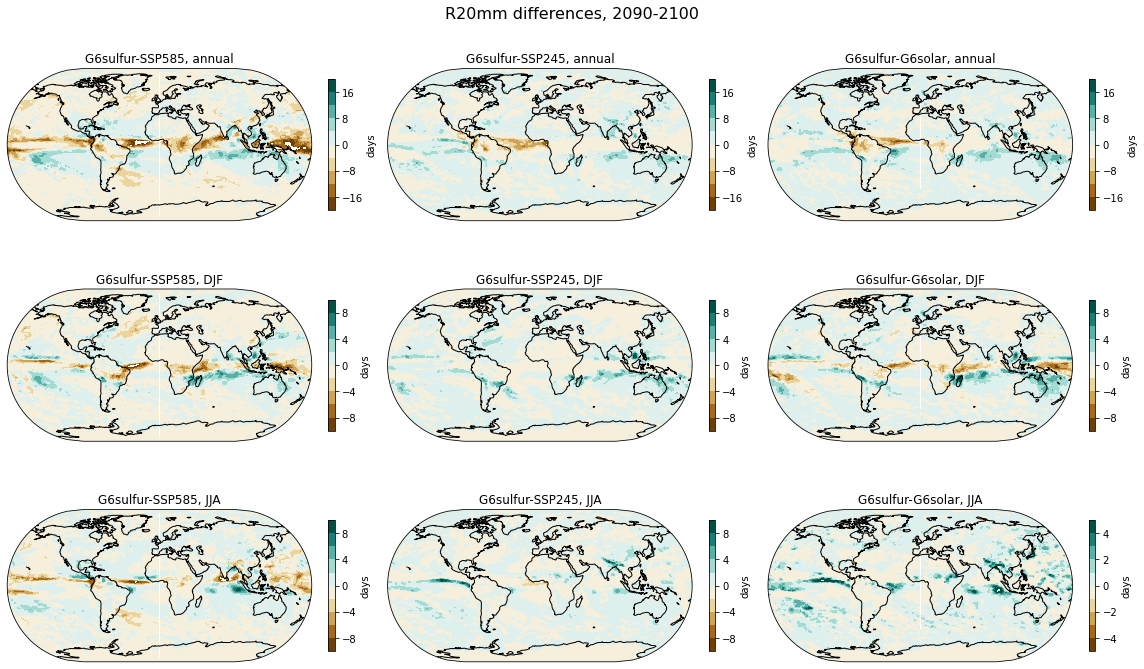

In [139]:
fig1, axs1 = plt.subplots(nrows=3, ncols=3, figsize=(16, 10), subplot_kw={'projection': ccrs.EckertIII()})
# annual
# SSP585-G6sulfur
cf1 = axs1[0,0].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur.sel(time = slice('2090','2099')).mean('time')-r20_585.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-20,20,11), cmap="BrBG")
fig1.colorbar(cf1, ax=axs1[0,0], orientation='vertical', fraction=0.02, label="days")
axs1[0,0].coastlines()
axs1[0,0].set_global()
axs1[0,0].set_title("G6sulfur-SSP585, annual")
# SSP245-G6sulfur
cf2 = axs1[0,1].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur.sel(time = slice('2090','2099')).mean('time')-r20_245.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-20,20,11), cmap="BrBG")
fig1.colorbar(cf2, ax=axs1[0,1], orientation='vertical',fraction=0.02, label="days")
axs1[0,1].coastlines()
axs1[0,1].set_global()
axs1[0,1].set_title("G6sulfur-SSP245, annual")
# G6solar-G6sulfur
cf3 = axs1[0,2].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur.sel(time = slice('2090','2099')).mean('time')-r20_solar.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-20,20,11), cmap="BrBG")
fig1.colorbar(cf3, ax=axs1[0,2], orientation='vertical',fraction=0.02, label="days")
axs1[0,2].coastlines()
axs1[0,2].set_global()
axs1[0,2].set_title("G6sulfur-G6solar, annual")
# DJF
# SSP585-G6sulfur
cf4 = axs1[1,0].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur_djf-r20_ssp585_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf4, ax=axs1[1,0], orientation='vertical', fraction=0.02, label="days")
axs1[1,0].coastlines()
axs1[1,0].set_global()
axs1[1,0].set_title("G6sulfur-SSP585, DJF")
# SSP545-G6sulfur
cf5 = axs1[1,1].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur_djf-r20_ssp245_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf5, ax=axs1[1,1], orientation='vertical', fraction=0.02, label="days")
axs1[1,1].coastlines()
axs1[1,1].set_global()
axs1[1,1].set_title("G6sulfur-SSP245, DJF")
# G6solar-G6sulfur
cf6 = axs1[1,2].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur_djf-r20_solar_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf6, ax=axs1[1,2], orientation='vertical', fraction=0.02, label="days")
axs1[1,2].coastlines()
axs1[1,2].set_global()
axs1[1,2].set_title("G6sulfur-G6solar, DJF")
# JJA
# SSP585-G6sulfur
cf7 = axs1[2,0].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur_jja-r20_ssp585_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap='BrBG')
fig1.colorbar(cf7, ax=axs1[2,0], orientation='vertical', fraction=0.02, label="days")
axs1[2,0].coastlines()
axs1[2,0].set_global()
axs1[2,0].set_title("G6sulfur-SSP585, JJA")
# SSP245-G6sulfur
cf8 = axs1[2,1].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur_jja-r20_ssp245_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap='BrBG')
fig1.colorbar(cf8, ax=axs1[2,1], orientation='vertical', fraction=0.02, label="days")
axs1[2,1].coastlines()
axs1[2,1].set_global()
axs1[2,1].set_title("G6sulfur-SSP245, JJA")
# G6solar-G6sulfur
cf9 = axs1[2,2].contourf(ds_solar.lon, ds_solar.lat, r20_sulfur_jja-r20_solar_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11), cmap='BrBG')
fig1.colorbar(cf9, ax=axs1[2,2], orientation='vertical', fraction=0.02, label="days")
axs1[2,2].coastlines()
axs1[2,2].set_global()
axs1[2,2].set_title("G6sulfur-G6solar, JJA")
fig1.suptitle("R20mm differences, 2090-2100", fontsize=16)
fig1.tight_layout()

## CDD - maximum number of consecutive days with RR < 1mm

In [99]:
cdd_solar = xclim.indicators.icclim.CDD(pr = ds_solar.sel(time = slice('2020-01-01','2099-12-30')).pr)
cdd_sulfur = xclim.indicators.icclim.CDD(pr = ds_sulfur.sel(time = slice('2020-01-01','2099-12-30')).pr)
cdd_g1 = xclim.indicators.icclim.CDD(pr = ds_G1.sel(time = slice('1870-01-01','1949-12-30')).pr)
cdd_585 = xclim.indicators.icclim.CDD(pr = ds_585.sel(time = slice('2020-01-01','2099-12-30')).pr)
cdd_245 = xclim.indicators.icclim.CDD(pr = ds_245.sel(time = slice('2020-01-01','2099-12-30')).pr)
cdd_picontrol = xclim.indicators.icclim.CDD(pr = pi_control.pr)

cdd_solar_seasonal = xclim.indicators.icclim.R20mm(pr = solar_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
cdd_sulfur_seasonal = xclim.indicators.icclim.R20mm(pr = sulfur_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
cdd_ssp245_seasonal = xclim.indicators.icclim.R20mm(pr = ssp245_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')
cdd_ssp585_seasonal = xclim.indicators.icclim.R20mm(pr = ssp585_p.sel(time = slice('2090-01-01','2099-12-30')).pr, freq = 'Q')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a 

In [100]:
#calculate seasonal means for DJF and JJA
cdd_solar_djf = cdd_solar_seasonal.sel(time=cdd_solar_seasonal.time.dt.month.isin([3])).mean('time')
cdd_sulfur_djf = cdd_sulfur_seasonal.sel(time=cdd_sulfur_seasonal.time.dt.month.isin([3])).mean('time')
cdd_ssp245_djf = cdd_ssp245_seasonal.sel(time=cdd_ssp245_seasonal.time.dt.month.isin([3])).mean('time')
cdd_ssp585_djf = cdd_ssp585_seasonal.sel(time=cdd_ssp585_seasonal.time.dt.month.isin([3])).mean('time')

cdd_solar_jja = cdd_solar_seasonal.sel(time=cdd_solar_seasonal.time.dt.month.isin([9])).mean('time')
cdd_sulfur_jja = cdd_sulfur_seasonal.sel(time=cdd_sulfur_seasonal.time.dt.month.isin([9])).mean('time')
cdd_ssp245_jja = cdd_ssp245_seasonal.sel(time=cdd_ssp245_seasonal.time.dt.month.isin([9])).mean('time')
cdd_ssp585_jja = cdd_ssp585_seasonal.sel(time=cdd_ssp585_seasonal.time.dt.month.isin([9])).mean('time')

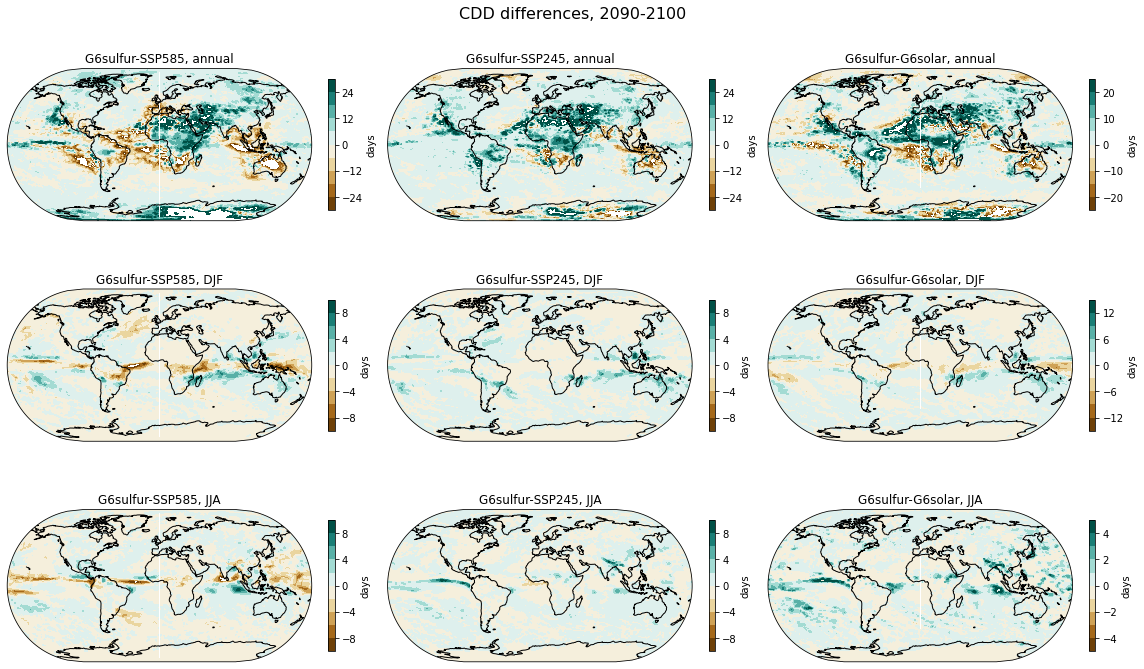

In [138]:
fig1, axs1 = plt.subplots(nrows=3, ncols=3, figsize=(16, 10), subplot_kw={'projection': ccrs.EckertIII()})
# annual
# SSP585-G6sulfur
cf1 = axs1[0,0].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur.sel(time = slice('2090','2099')).mean('time')-cdd_585.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-30,30,11), cmap="BrBG")
fig1.colorbar(cf1, ax=axs1[0,0], orientation='vertical', fraction=0.02, label="days")
axs1[0,0].coastlines()
axs1[0,0].set_global()
axs1[0,0].set_title("G6sulfur-SSP585, annual")
# SSP245-G6sulfur
cf2 = axs1[0,1].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur.sel(time = slice('2090','2099')).mean('time')-cdd_245.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-30,30,11), cmap="BrBG")
fig1.colorbar(cf2, ax=axs1[0,1], orientation='vertical',fraction=0.02, label="days")
axs1[0,1].coastlines()
axs1[0,1].set_global()
axs1[0,1].set_title("G6sulfur-SSP245, annual")
# G6solar-G6sulfur
cf3 = axs1[0,2].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur.sel(time = slice('2090','2099')).mean('time')-cdd_solar.sel(time = slice('2090','2099')).mean('time'), \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-25,25,11), cmap="BrBG")
fig1.colorbar(cf3, ax=axs1[0,2], orientation='vertical',fraction=0.02, label="days")
axs1[0,2].coastlines()
axs1[0,2].set_global()
axs1[0,2].set_title("G6sulfur-G6solar, annual")
# DJF
# SSP585-G6sulfur
cf4 = axs1[1,0].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur_djf-cdd_ssp585_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf4, ax=axs1[1,0], orientation='vertical', fraction=0.02, label="days")
axs1[1,0].coastlines()
axs1[1,0].set_global()
axs1[1,0].set_title("G6sulfur-SSP585, DJF")
# SSP545-G6sulfur
cf5 = axs1[1,1].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur_djf-cdd_ssp245_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap="BrBG")
fig1.colorbar(cf5, ax=axs1[1,1], orientation='vertical', fraction=0.02, label="days")
axs1[1,1].coastlines()
axs1[1,1].set_global()
axs1[1,1].set_title("G6sulfur-SSP245, DJF")
# G6solar-G6sulfur
cf6 = axs1[1,2].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur_djf-cdd_solar_djf, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-15,15,11), cmap="BrBG")
fig1.colorbar(cf6, ax=axs1[1,2], orientation='vertical', fraction=0.02, label="days")
axs1[1,2].coastlines()
axs1[1,2].set_global()
axs1[1,2].set_title("G6sulfur-G6solar, DJF")
# JJA
# SSP585-G6sulfur
cf7 = axs1[2,0].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur_jja-cdd_ssp585_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap='BrBG')
fig1.colorbar(cf7, ax=axs1[2,0], orientation='vertical', fraction=0.02, label="days")
axs1[2,0].coastlines()
axs1[2,0].set_global()
axs1[2,0].set_title("G6sulfur-SSP585, JJA")
# SSP245-G6sulfur
cf8 = axs1[2,1].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur_jja-cdd_ssp245_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-10,10,11), cmap='BrBG')
fig1.colorbar(cf8, ax=axs1[2,1], orientation='vertical', fraction=0.02, label="days")
axs1[2,1].coastlines()
axs1[2,1].set_global()
axs1[2,1].set_title("G6sulfur-SSP245, JJA")
# G6solar-G6sulfur
cf9 = axs1[2,2].contourf(ds_solar.lon, ds_solar.lat, cdd_sulfur_jja-cdd_solar_jja, \
                        transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11), cmap='BrBG')
fig1.colorbar(cf9, ax=axs1[2,2], orientation='vertical', fraction=0.02, label="days")
axs1[2,2].coastlines()
axs1[2,2].set_global()
axs1[2,2].set_title("G6sulfur-G6solar, JJA")
fig1.suptitle("CDD differences, 2090-2100", fontsize=16)
fig1.tight_layout()